### Desbalanceamento de Classes 

Dados desbalanceados são um problema para a construção de um modelo de Machine learning, os algoritmos de machine learning partem da premissa, que o balanceamento dos dados deve ser consideravél, pois treinar um modelo com uma discrepância grande de exemplos de cada classe, faz com que o modelo sobreponha a classe minoritária. 

Neste guia vou demonstrar algumas técnicas de como tratar, conjunto de dados que possuem um desbalancemante de classes. 

<hr>

<p align=center>
<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2F67qja%2Fbtqx8AVDBN8%2FFs7wjgngVukhQENwabB4tK%2Fimg.png" width="70%"></p>

<hr>

#### Dados de exemplo 

Vamos utilizar os dados de uma instituição financeira, onde o objetivo é criar um classificador que consiga, identificar uma transação como sendo fraudulenta. 

Este é um caso clássico no mercado, onde a ocorrência de uma fraude bancária é mínima, e se tem esse gap gigantesco nos dados. 


Vou utilizar apenas o Random Forest para exemplificar cada técnica, o objetivo é entender os detalhes de cada técnica. 

<br>

In [1]:
# Biblioteca Imblearn 
!pip install imblearn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, QuantileTransformer, RobustScaler


%matplotlib inline 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importando dados 
path = '/content/drive/My Drive/ML_Notebooks/Detecção de Fraude /creditcard.csv' 
credit = pd.read_csv(path)
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
X = credit.drop('Class', axis=1)
y = credit['Class']

# split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


# StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Encoder 
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

0    284315
1       492
Name: Class, dtype: int64

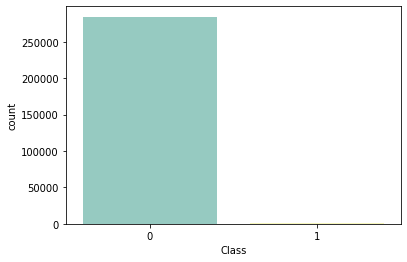

In [5]:
sns.countplot(credit['Class'], palette='Set3')
credit['Class'].value_counts()

In [6]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.79      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<hr>
<br>
<br>
<hr>
<br>
<br>

### OverSampling 





<p align=center>
<img src="https://miro.medium.com/max/750/1*aKJJOozIlVVH1gT-4rYy4w.png" width="50%"></p>



<hr>
<br>

#### RandomOverSampler

Técnica de OverSampling com sobreamostragem aleatória. A sobreamostragem aleatória simplesmente replica aleatoriamente os exemplos de classes minoritárias. Sabe-se que a sobreamostragem aleatória aumenta a probabilidade de ocorrência de sobreajuste (Overfitting).

In [0]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
# RandomOverSampler

X = credit.drop('Class', axis=1)
y = credit['Class']


sampler = RandomOverSampler(ratio={0:284315, 1:17000} ,random_state=42)
X_rs, y_rs = sampler.fit_sample(X, y)

# Balanceamento 
np.bincount(y_rs)

array([284315,  17000])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
mdl = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85354
           1       1.00      0.91      0.95      5041

    accuracy                           1.00     90395
   macro avg       1.00      0.96      0.98     90395
weighted avg       1.00      1.00      0.99     90395



Neste exemplo, utilizamos o RandomOverSampler, ele conseguiu capturar 91% das fraudes (Recall), definimos que deveria ser reproduzido  17.000 amostras da classe fraude, é um número muito razoável comparado a classe majoritária, e aqui coloquei um valor bem abaixo da classe predominante, pelo fato de ser um técnica que está muito sujeita ao Overfitting, tem que ter uma atanção a mais no valor que vai inserir para a Sobreamostragem. 

<hr>
<br>
<br>
<hr>
<br>

### SMOTE 

SMOTE é outra técnica de OverSampling, para evitar o problema do excesso de adaptação, propõem a Técnica de Sobre-Amostragem de Minorias Sintéticas (SMOTE). Este método é considerado uma técnica de ponta e funciona bem em várias aplicações. Este método gera dados sintéticos com base nas semelhanças do espaço de recurso entre instâncias minoritárias existentes. Para criar uma instância sintética, ele encontra os vizinhos K-mais próximos de cada instância minoritária, seleciona aleatoriamente um deles e calcula interpolações lineares para produzir uma nova instância minoritária na vizinhança.




<hr>

In [0]:
from imblearn.over_sampling import SMOTE 

In [12]:
# SMOTE 

X = credit.drop('Class', axis=1)
y = credit['Class']

smt = SMOTE(sampling_strategy=0.20, k_neighbors=5 ,random_state=42)
X_smt, y_smt = smt.fit_sample(X, y)

# Balanceamento 
np.bincount(y_smt)

array([284315,  56863])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [14]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85373
           1       1.00      0.96      0.98     16981

    accuracy                           0.99    102354
   macro avg       1.00      0.98      0.99    102354
weighted avg       0.99      0.99      0.99    102354



<br>
<hr>
<br>
<br>
<br>
<hr>

### ADASYN

Amostragem Sintética Adaptativa técnica de OverSampling também, O ADASYN gera amostras da classe minoritária de acordo com suas distribuições de densidade. Dados mais sintéticos são gerados para amostras de classes minoritárias mais difíceis de aprender, em comparação com aquelas amostras minoritárias mais fáceis de aprender. 

Ele calcula os vizinhos K-mais próximos de cada instância minoritária e obtém a taxa de classe das instâncias minoritárias e majoritárias para gerar novas amostras. Ao repetir esse processo, ele muda de forma adaptativa o limite de decisão para se concentrar nas amostras que são difíceis de aprender.

<hr>

In [0]:
from imblearn.over_sampling import ADASYN

In [16]:
X = credit.drop('Class', axis=1)
y = credit['Class']

ada = ADASYN(n_neighbors=5 ,random_state=42)
X_ada, y_ada = ada.fit_sample(X, y)

# Balanceamento 
np.bincount(y_ada)

array([284315, 284298])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85373
           1       1.00      0.96      0.98     16981

    accuracy                           0.99    102354
   macro avg       1.00      0.98      0.99    102354
weighted avg       0.99      0.99      0.99    102354



<br>
<hr>
<br>
<br>
<hr>
<br>

### UnderSampling 

UnderSampling são técnicas de balancemento de dados, que reduz a classe majoritária do conjunto de dados, na tentativa de igualar com a classe minoritária, são técnicas bastante usadas para dados desbalanceados, a vantagem de técnicas de Under Sampling é reduzir o ruído nos dados majoritários, a desvantagem dessas técnicas é que, ao reduzir as classes majoritárias pode acabar excluindo amostras, que tem uma grande representividade para o modelo. 


A questão do desequilíbrio de classe pode resultar em um sério viés para a classe majoritária, reduzindo o desempenho da classificação e aumentando o número de falsos negativos. Como podemos aliviar o problema? As técnicas mais usadas são a reamostragem de dados ou subamostrando a maioria da classe, ou superamostrando a classe minoritária ou uma mistura de ambas. Isso resultará em melhor desempenho da classificação.


<p align=center>
<img src="https://miro.medium.com/max/670/1*YH_vPYQEDIW0JoUYMeLz_A.png" width="50%"></p>




<hr>

#### Cluster Centroids

Uma técnica de UnderSampling que oferece uma maneira eficiente de representar o cluster de dados com um número reduzido de amostras. Lembre-se de que esse método exige que seus dados sejam agrupados em clusters. Além disso, o número de centróides deve ser definido de forma que os clusters subamostrados sejam representativos do original.

A vantagem dessa técnica é que ele permite, mantes as amostras mais representativas do conjunto de dados, assim reduz a perda de informação. 

In [0]:
from imblearn.under_sampling import ClusterCentroids

In [20]:
X = credit.drop('Class', axis=1)
y = credit['Class']


cc = ClusterCentroids(ratio={0:1200, 1:492},random_state=42)
X_cc, y_cc = cc.fit_sample(X, y)

# Balanceamento 
np.bincount(y_cc)

/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (473) found smaller than n_clusters (492). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])


array([1200,  492])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [22]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      0.99      1.00       154

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508



<br>
<hr>
<br>
<br>
<hr>
<br>

#### Random Undem Sampler 


Técnica de UnderSampling com subamostragem aleatória. A sobreamostragem aleatória simplesmente é uma maneira rápida e fácil de equilibrar os dados, selecionando aleatoriamente um subconjunto de dados para as classes de destino. 


Uma técnica simples de subamostragem é subestimar a classe majoritária aleatória e uniformemente. Isso pode levar à perda de informações. Mas se os exemplos da classe majoritária estiverem próximos de outros, esse método poderá produzir bons resultados.

<hr>


In [0]:
from imblearn.under_sampling import RandomUnderSampler 

In [24]:
X = credit.drop('Class', axis=1)
y = credit['Class']


ump = RandomUnderSampler(random_state=42)
X_ump, y_ump = ump.fit_sample(X, y)

# Balanceamento 
np.bincount(y_ump)

array([492, 492])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_ump, y_ump, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [26]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



<br>
<hr>
<br>
<br>
<hr>
<br>

#### NearMiss 


Para atacar a questão da perda potencial de informações, o método “vizinho próximo” e suas variações foram propostos. Os algoritmos básicos da família do vizinho próximo são: primeiro, o método calcula as distâncias entre todas as instâncias da classe majoritária e as instâncias da classe minoritária. Em seguida, são selecionadas k instâncias da classe majoritária que têm as menores distâncias da classe minoritária. Se houver N instâncias na classe minoritária, o método "mais próximo" resultará em k * n instâncias da classe majoritária.

<br>

Parâmetro <b> version: </b>


* NearMiss-1" seleciona amostras da classe majoritária em que suas distâncias médias até as três instâncias mais próximas da classe minoritária são as menores.

*  NearMiss-2" usa três amostras mais distantes da classe minoritária.
* NearMiss-3" seleciona um número determinado das amostras mais próximas da classe majoritária para cada amostra da classe minoritária.


<hr>


In [0]:
from imblearn.under_sampling import NearMiss 

In [28]:
X = credit.drop('Class', axis=1)
y = credit['Class']


nss = NearMiss(ratio={0:1200, 1:492}, version=2 ,random_state=42)
X_nss, y_nss = nss.fit_sample(X, y)

# Balanceamento 
np.bincount(y_nss)

array([1200,  492])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_nss, y_nss, test_size=0.30, random_state=42)
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [30]:
mdl = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       0.99      0.99      0.99       154

    accuracy                           0.99       508
   macro avg       0.99      0.99      0.99       508
weighted avg       0.99      0.99      0.99       508



<hr>
<br>
<hr>
<br>
<br>



### Conclusão



Neste guia aprendemos as principais técnicas de Reamostragem para dados desbalanceados, de qualquer forma temos que tomar cuidado com Overfitting, é necessário ter uma intuição e ponderar os parâmetros de cada técnica apresentada, há casos em que se pode fazer a mistura de uma técnica de OverSampling com UnderSampling para obter um métrica maior, a validação cruzada também é importante e deve ser aplicada para evidenciar a performance do modelo, para que não estejamos errando quanto as estimativas retornadas, testar uma combinação de técnicas de balanceamento com o tuning de hiperparâmetros dos modelos, como modelos baseados em Árvore, pode ser uma excelente abordagem, espero que esse guia atenda os problemas de desbalanceamento de dados estruturados. 

<br>
<hr>
<br>
<br>
<hr>
<br>